WEEK 1

In [1]:
import pandas as pd

In [2]:
# Load dataset
df = pd.read_csv("D:\\Indian_Kids_Screen_Time.csv")
# Show first 10 rows
df.head(10)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban
6,17,Male,2.97,TV,False,0.48,NaN,Rural
7,10,Male,2.74,TV,True,0.54,NaN,Urban
8,14,Male,4.61,Laptop,True,0.36,"Poor Sleep, Anxiety",Rural
9,18,Male,3.24,Tablet,True,0.48,"Poor Sleep, Obesity Risk",Urban


In [3]:
# Null values count per column
df.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [4]:
# Count of duplicate rows
df.duplicated().sum()
# Show duplicate rows if any
df[df.duplicated()]

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
996,16,Female,4.42,Laptop,True,0.35,"Poor Sleep, Anxiety",Urban
1700,9,Female,0.00,Smartphone,False,0.60,NaN,Urban
2090,10,Female,0.00,Tablet,False,0.49,NaN,Urban
3089,16,Male,4.81,Smartphone,True,0.31,NaN,Urban
3213,8,Female,4.84,Smartphone,True,0.46,Poor Sleep,Rural
3308,8,Female,0.00,Smartphone,False,0.53,NaN,Urban
3572,8,Male,0.00,Smartphone,False,0.41,NaN,Urban
4166,8,Female,0.00,Smartphone,False,0.47,NaN,Urban
4460,8,Female,0.00,Smartphone,False,0.47,NaN,Urban
4960,10,Female,0.00,Smartphone,False,0.55,NaN,Urban


In [5]:
# Info about columns
df.info()
# Data types
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


Age                                    int64
Gender                                object
Avg_Daily_Screen_Time_hr             float64
Primary_Device                        object
Exceeded_Recommended_Limit              bool
Educational_to_Recreational_Ratio    float64
Health_Impacts                        object
Urban_or_Rural                        object
dtype: object

In [7]:
# Numerical columns summary
df.describe()
# Categorical columns summary
df.describe(include=['object'])
# All columns (both numerical + categorical)
df.describe(include='all')

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
count,9712.000000,9712,9712.000000,9712,9712,9712.000000,6494,9712
unique,NaN,2,NaN,4,2,NaN,15,2
top,NaN,Male,NaN,Smartphone,True,NaN,Poor Sleep,Urban
freq,NaN,4942,NaN,4568,8301,NaN,2268,6851
mean,12.979201,NaN,4.352837,NaN,NaN,0.427226,NaN,NaN
std,3.162437,NaN,1.718232,NaN,NaN,0.073221,NaN,NaN
min,8.000000,NaN,0.000000,NaN,NaN,0.300000,NaN,NaN
25%,10.000000,NaN,3.410000,NaN,NaN,0.370000,NaN,NaN
50%,13.000000,NaN,4.440000,NaN,NaN,0.430000,NaN,NaN
75%,16.000000,NaN,5.380000,NaN,NaN,0.480000,NaN,NaN


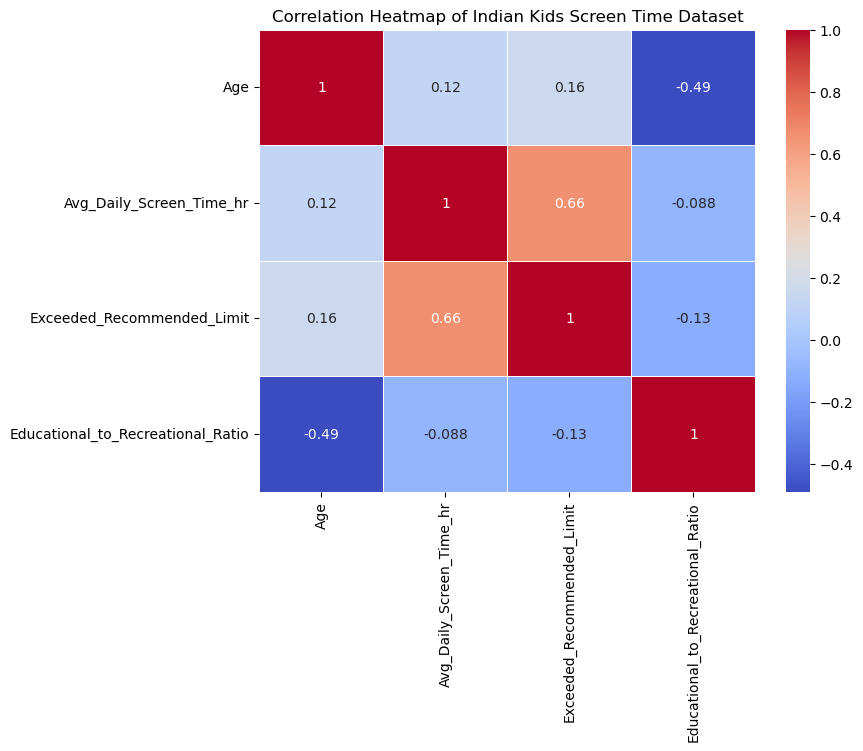

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load dataset again
df = pd.read_csv("D:\\Indian_Kids_Screen_Time.csv")
# Correlation matrix for numeric columns
corr = df.corr(numeric_only=True)
# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Indian Kids Screen Time Dataset")
plt.show()

In [8]:
import pandas as pd
df = pd.read_csv("D:\Indian_Kids_Screen_Time.csv")

numeric_df = df[["Age", "Avg_Daily_Screen_Time_hr", "Educational_to_Recreational_Ratio"]]

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)

IQR = Q3 - Q1

print("Q1 values:\n", Q1)
print("\nQ3 values:\n", Q3)
print("\nIQR values:\n", IQR)

Q1 values:
 Age                                  10.00
Avg_Daily_Screen_Time_hr              3.41
Educational_to_Recreational_Ratio     0.37
Name: 0.25, dtype: float64

Q3 values:
 Age                                  16.00
Avg_Daily_Screen_Time_hr              5.38
Educational_to_Recreational_Ratio     0.48
Name: 0.75, dtype: float64

IQR values:
 Age                                  6.00
Avg_Daily_Screen_Time_hr             1.97
Educational_to_Recreational_Ratio    0.11
dtype: float64


# Project: Indian Kids Screen Time Dataset
##  About the Dataset
This dataset gives us details about Indian kids and how much time they spend on screens.  
It has information like their **age**, **average daily screen time (in hours)**, and the **ratio of educational vs recreational usage**.  
Basically, it helps us see how much of kids' screen time is productive (study/learning) vs just fun (games, videos, etc.).
## Checking for Null (Missing) Values
- I checked if the dataset has any empty or missing values.  
- Luckily, there are no null values here, so the data looks clean.  
## Duplicate Records
- I also checked if the same data row is repeated.  
- If duplicates exist, they can mess up analysis.  
## Correlation Between Columns
- Correlation tells us if two things move together (positive) or opposite (negative).  
- Example: If **Age** increases, does **screen time** increase too?  
- In this dataset, screen time and age have a weak positive correlation, but not super strong.  
## Describe (Data Summary)
- For numerical columns like **Age** and **Screen Time**, I got details such as average, minimum, maximum, etc.  
- For categorical columns, I saw the unique values and their frequency.  
## Conclusion
This dataset looks pretty clean and gives us a basic idea of kids' screen habits.  
From here, I can explore things like:
- Which age group spends the most time on screens?  
- Are younger kids using screens more for fun or for studies?  
- Is screen time balanced or leaning more towards recreation?  
In simple words, this project helps me understand how Indian kids are spending time on screens and if it’s more for education or entertainment.

WEEK 2

In [2]:
#Categorising Age bands
import pandas as pd
# Load dataset again
df = pd.read_csv("D:\Indian_Kids_Screen_Time.csv")
df = df[df['Age'] >= 8]
bins = [7, 12, 16, 18]
labels = ['Pre-teens', 'Teenagers', 'Late teens']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
print(df[['Age', 'Age_Group']].head())

   Age   Age_Group
0   14   Teenagers
1   11   Pre-teens
2   18  Late teens
3   15   Teenagers
4   12   Pre-teens


In [3]:
cols = df.columns.tolist()
cols.insert(cols.index('Age') + 1, cols.pop(cols.index('Age_Group')))
df = df[cols]

print(df)

      Age   Age_Group  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0      14   Teenagers    Male                      3.99     Smartphone   
1      11   Pre-teens  Female                      4.61         Laptop   
2      18  Late teens  Female                      3.73             TV   
3      15   Teenagers  Female                      1.21         Laptop   
4      12   Pre-teens  Female                      5.89     Smartphone   
...   ...         ...     ...                       ...            ...   
9707   17  Late teens    Male                      3.26     Smartphone   
9708   17  Late teens  Female                      4.43     Smartphone   
9709   16   Teenagers    Male                      5.62     Smartphone   
9710   17  Late teens    Male                      5.60             TV   
9711   15   Teenagers  Female                      6.12             TV   

      Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                           True        

In [4]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Age                                     0
Age_Group                               0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64


In [5]:
#correcting null values with No health imapact
df['Health_Impacts'] = df['Health_Impacts'].fillna('No health impacts')
df.head(20)

,Age,Age_Group,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Teenagers,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Pre-teens,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Late teens,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Teenagers,Female,1.21,Laptop,False,0.39,No health impacts,Urban
4,12,Pre-teens,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
5,14,Teenagers,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban
6,17,Late teens,Male,2.97,TV,False,0.48,No health impacts,Rural
7,10,Pre-teens,Male,2.74,TV,True,0.54,No health impacts,Urban
8,14,Teenagers,Male,4.61,Laptop,True,0.36,"Poor Sleep, Anxiety",Rural
9,18,Late teens,Male,3.24,Tablet,True,0.48,"Poor Sleep, Obesity Risk",Urban


In [17]:
# categorising health impact in terms of its physical or mental impact 
physical = ["Eye Strain", "Headache", "Poor Posture", "Obesity", "Fatigue"]
mental = ["Poor Sleep", "Anxiety", "Stress", "Depression", "Addiction"]

df["Health_Impact_Category"] = df["Health_Impacts"].apply(
    lambda x: "No Impact" if pd.isna(x) or str(x).strip().lower() == "none"
    else "Both Physical and Mental" if any(p in str(x) for p in physical) and any(m in str(x) for m in mental)
    else "Physical" if any(p in str(x) for p in physical)
    else "Mental" if any(m in str(x) for m in mental)
    else "No Impact"
)
df.head(10)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Health_Impact_Category
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Both Physical and Mental
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Mental
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Mental
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban,No Impact
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Mental
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban,Mental
6,17,Male,2.97,TV,False,0.48,NaN,Rural,No Impact
7,10,Male,2.74,TV,True,0.54,NaN,Urban,No Impact
8,14,Male,4.61,Laptop,True,0.36,"Poor Sleep, Anxiety",Rural,Mental
9,18,Male,3.24,Tablet,True,0.48,"Poor Sleep, Obesity Risk",Urban,Both Physical and Mental


In [7]:
cols = df.columns.tolist()
cols.insert(cols.index('Health_Impacts') + 1, cols.pop(cols.index('Health_Impact_Category')))
df = df[cols]

print(df.head(10))

   Age   Age_Group  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0   14   Teenagers    Male                      3.99     Smartphone   
1   11   Pre-teens  Female                      4.61         Laptop   
2   18  Late teens  Female                      3.73             TV   
3   15   Teenagers  Female                      1.21         Laptop   
4   12   Pre-teens  Female                      5.89     Smartphone   
5   14   Teenagers  Female                      4.88     Smartphone   
6   17  Late teens    Male                      2.97             TV   
7   10   Pre-teens    Male                      2.74             TV   
8   14   Teenagers    Male                      4.61         Laptop   
9   18  Late teens    Male                      3.24         Tablet   

   Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                        True                               0.42   
1                        True                               0.30   
2             

In [5]:
import pandas as pd
df = pd.read_csv("D:\Indian_Kids_Screen_Time.csv")
def categorize_device(device):
    if device == 'TV':
        return 'Wallmounted'
    else:
        return 'Portable'
df['Device_Category'] = df['Primary_Device'].apply(categorize_device)
df.head(10)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Device_Category
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Portable
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Portable
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Wallmounted
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban,Portable
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Portable
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban,Portable
6,17,Male,2.97,TV,False,0.48,NaN,Rural,Wallmounted
7,10,Male,2.74,TV,True,0.54,NaN,Urban,Wallmounted
8,14,Male,4.61,Laptop,True,0.36,"Poor Sleep, Anxiety",Rural,Portable
9,18,Male,3.24,Tablet,True,0.48,"Poor Sleep, Obesity Risk",Urban,Portable


In [10]:
def screen_size(device):
    if device == 'TV':
        return '>30'
    elif device in ['Smartphone', 'Laptop', 'Tablet']:
        return '<30'
    else:
        return 'Unknown'  

df['Screen_Size'] = df['Primary_Device'].apply(screen_size)
df.head(20)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Device_Category,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Screen_Size
0,14,Male,3.99,Smartphone,Portable,True,0.42,"Poor Sleep, Eye Strain",Urban,<30
1,11,Female,4.61,Laptop,Portable,True,0.30,Poor Sleep,Urban,<30
2,18,Female,3.73,TV,Wallmounted,True,0.32,Poor Sleep,Urban,>30
3,15,Female,1.21,Laptop,Portable,False,0.39,NaN,Urban,<30
4,12,Female,5.89,Smartphone,Portable,True,0.49,"Poor Sleep, Anxiety",Urban,<30
5,14,Female,4.88,Smartphone,Portable,True,0.44,Poor Sleep,Urban,<30
6,17,Male,2.97,TV,Wallmounted,False,0.48,NaN,Rural,>30
7,10,Male,2.74,TV,Wallmounted,True,0.54,NaN,Urban,>30
8,14,Male,4.61,Laptop,Portable,True,0.36,"Poor Sleep, Anxiety",Rural,<30
9,18,Male,3.24,Tablet,Portable,True,0.48,"Poor Sleep, Obesity Risk",Urban,<30


In [6]:
# new column for future usage 
def awareness_level(screen_time):
    if 0 <= screen_time < 3:
        return 'No harm'
    elif 3 <= screen_time < 6:
        return 'Need Attention'
    elif 6 <= screen_time < 9:
        return 'Moderate Concern'
    elif 9 <= screen_time < 12:
        return 'High Concern'
    else:
        return 'Critical Concern'
df['awareness'] = df['Avg_Daily_Screen_Time_hr'].apply(awareness_level)
df.head(20)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,awareness
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Need Attention
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Need Attention
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Need Attention
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban,No harm
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Need Attention
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban,Need Attention
6,17,Male,2.97,TV,False,0.48,NaN,Rural,No harm
7,10,Male,2.74,TV,True,0.54,NaN,Urban,No harm
8,14,Male,4.61,Laptop,True,0.36,"Poor Sleep, Anxiety",Rural,Need Attention
9,18,Male,3.24,Tablet,True,0.48,"Poor Sleep, Obesity Risk",Urban,Need Attention


In [7]:
# saving the updated data set
df.to_csv('Updated_Dataset.csv', index=False)

WEEK 2: Data Cleaning & Age Grouping

1.I checked for missing values and handled them by looking at related columns, so the data became more reliable and realistic.

2.Duplicate records were removed to avoid repeating information.

3.I made sure only useful columns and rows were kept, so the dataset is clean and ready for analysis.

4.For better understanding, I grouped the kids’ ages into categories like Pre-teens, Teenagers, and Late Teens instead of keeping just numbers.

5.This grouping makes it easier to compare patterns between different age groups and understand how screen time changes as kids grow older.

6.After cleaning and grouping, the dataset is much easier to analyze and will give clearer insights for further tasks or modeling.

Week 3
Univariate & Bivariate Analysis

In [9]:
import pandas as pd 
df = pd.read_csv("D:/Updated_Dataset.csv")
df.head(12)

,Age,Age_Group,Gender,Avg_Daily_Screen_Time_hr,awareness,Primary_Device,Device_Category,Screen_Size,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Health_Impact_Category,Urban_or_Rural
0,14,Teenagers,Male,3.99,Need Attention,Smartphone,Portable,<30,True,0.42,"Poor Sleep, Eye Strain",Both Physical and Mental,Urban
1,11,Pre-teens,Female,4.61,Need Attention,Laptop,Portable,<30,True,0.30,Poor Sleep,Mental,Urban
2,18,Late teens,Female,3.73,Need Attention,TV,Wallmounted,>30,True,0.32,Poor Sleep,Mental,Urban
3,15,Teenagers,Female,1.21,No harm,Laptop,Portable,<30,False,0.39,No health impacts,No Impact,Urban
4,12,Pre-teens,Female,5.89,Need Attention,Smartphone,Portable,<30,True,0.49,"Poor Sleep, Anxiety",Mental,Urban
5,14,Teenagers,Female,4.88,Need Attention,Smartphone,Portable,<30,True,0.44,Poor Sleep,Mental,Urban
6,17,Late teens,Male,2.97,No harm,TV,Wallmounted,>30,False,0.48,No health impacts,No Impact,Rural
7,10,Pre-teens,Male,2.74,No harm,TV,Wallmounted,>30,True,0.54,No health impacts,No Impact,Urban
8,14,Teenagers,Male,4.61,Need Attention,Laptop,Portable,<30,True,0.36,"Poor Sleep, Anxiety",Mental,Rural
9,18,Late teens,Male,3.24,Need Attention,Tablet,Portable,<30,True,0.48,"Poor Sleep, Obesity Risk",Both Physical and Mental,Urban


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Age_Group                          9712 non-null   object 
 2   Gender                             9712 non-null   object 
 3   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 4   awareness                          9712 non-null   object 
 5   Primary_Device                     9712 non-null   object 
 6   Device_Category                    9712 non-null   object 
 7   Screen_Size                        9712 non-null   object 
 8   Exceeded_Recommended_Limit         9712 non-null   bool   
 9   Educational_to_Recreational_Ratio  9712 non-null   float64
 10  Health_Impacts                     9712 non-null   object 
 11  Health_Impact_Category             9712 non-null   objec

Univariate Analysis

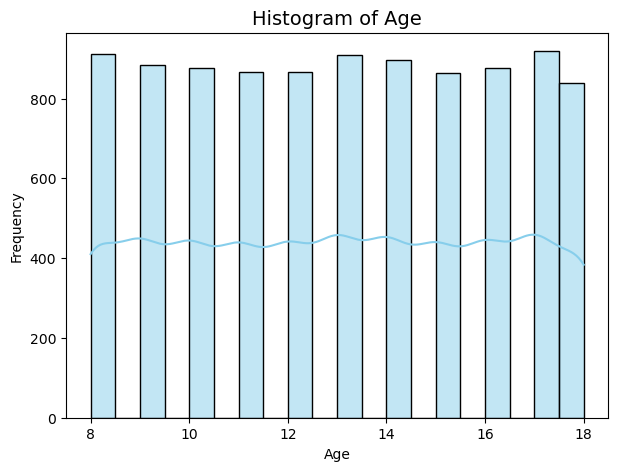

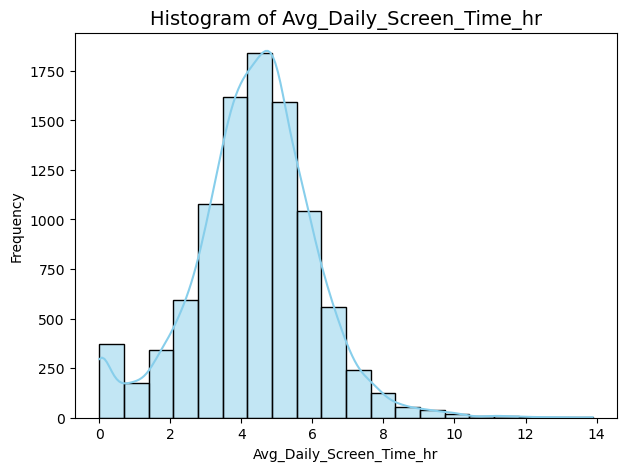

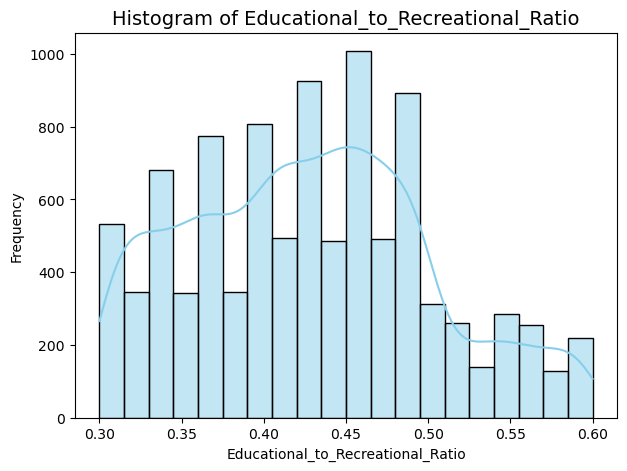

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms with KDE for all numeric columns
for col in num_cols:
    plt.figure(figsize=(7,5))
    sns.histplot(df[col], bins=20, kde=True, color="skyblue")
    plt.title(f"Histogram of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


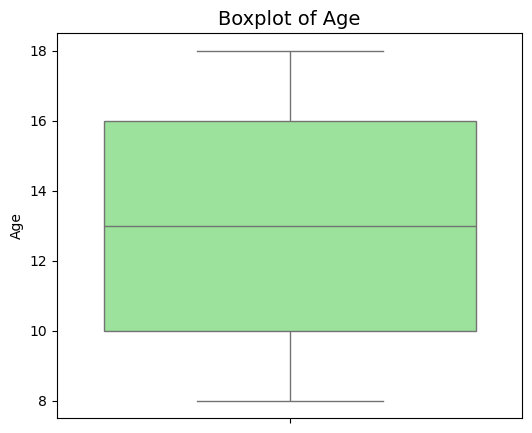

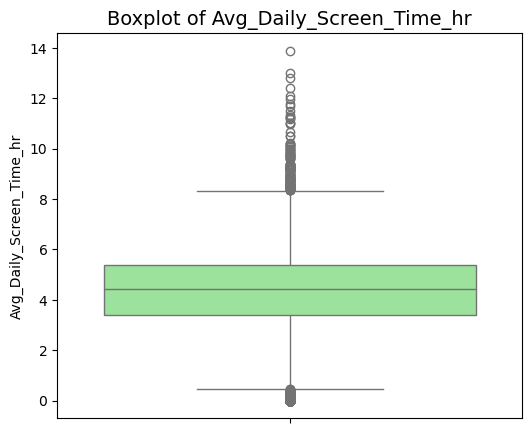

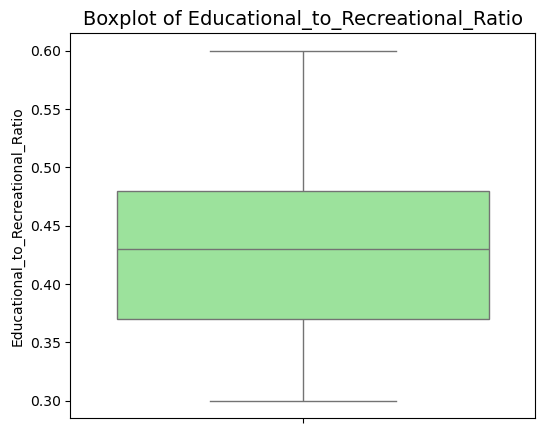

In [22]:
# Plot boxplots for all numeric columns
for col in num_cols:
    plt.figure(figsize=(6,5))
    sns.boxplot(y=df[col], color="lightgreen")
    plt.title(f"Boxplot of {col}", fontsize=14)
    plt.ylabel(col)
    plt.show()


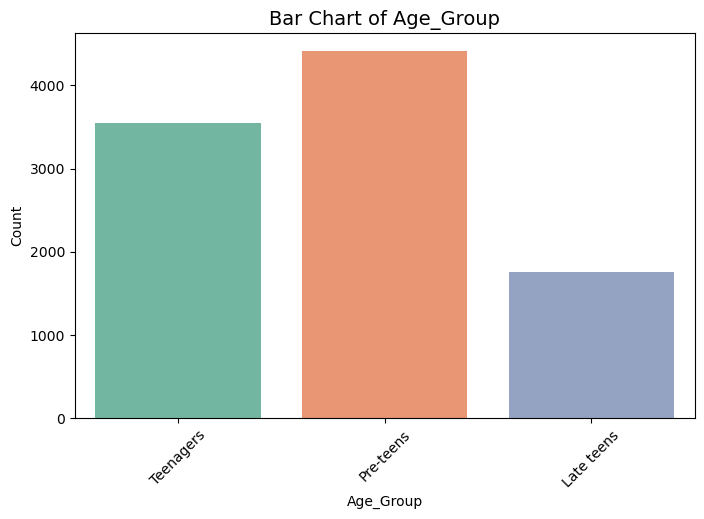

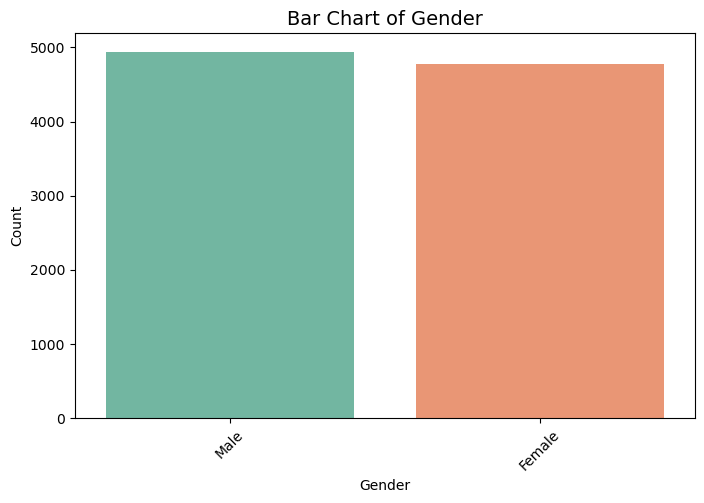

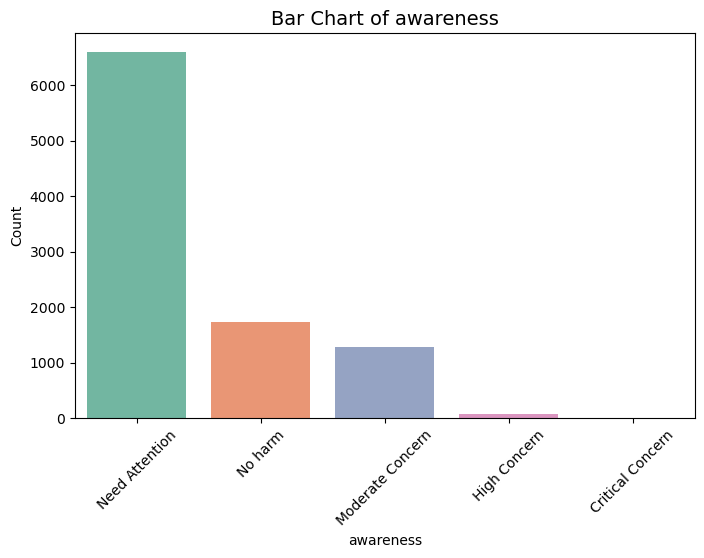

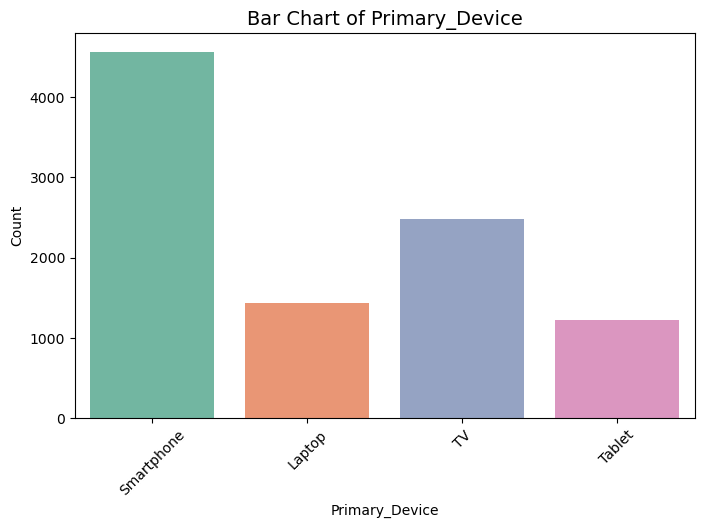

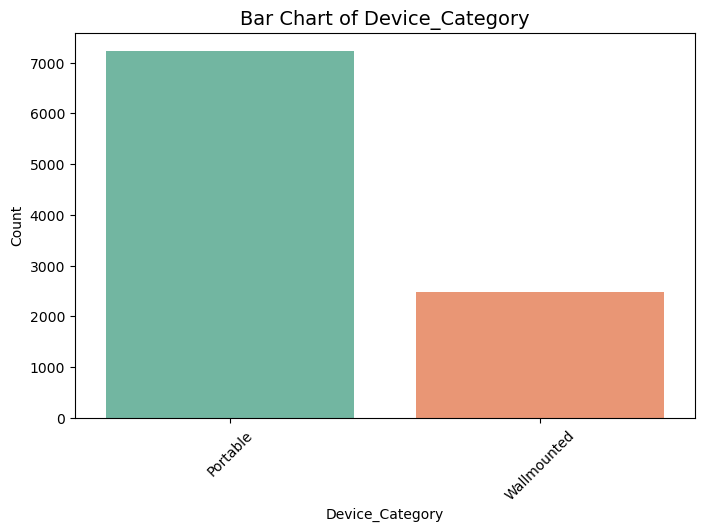

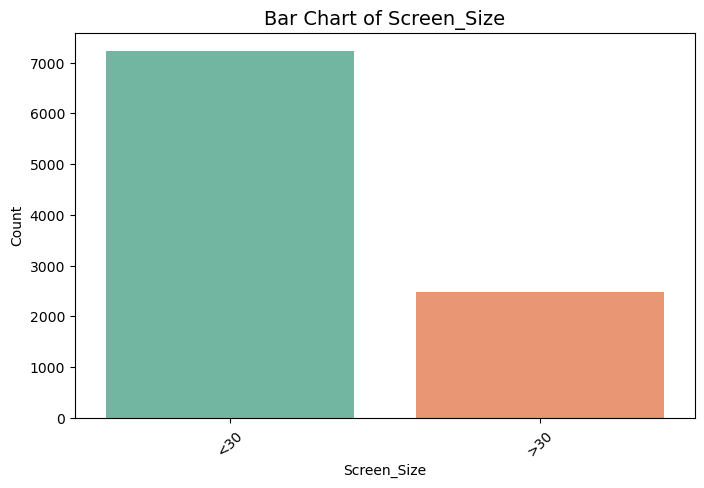

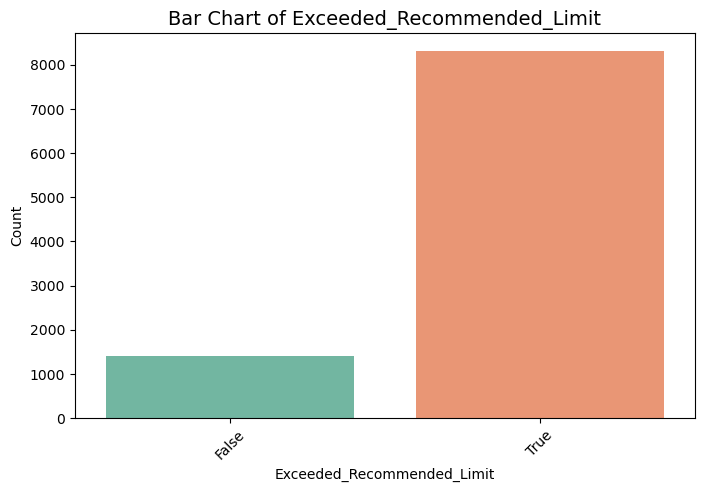

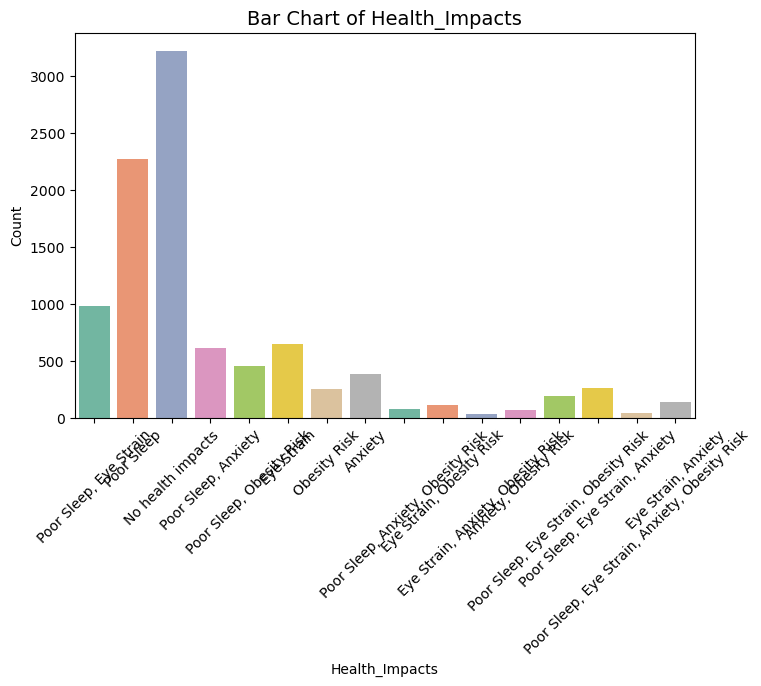

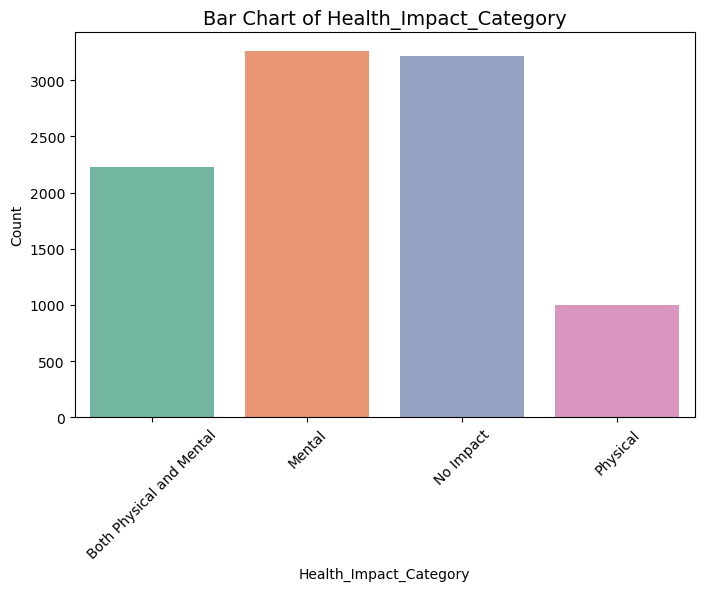

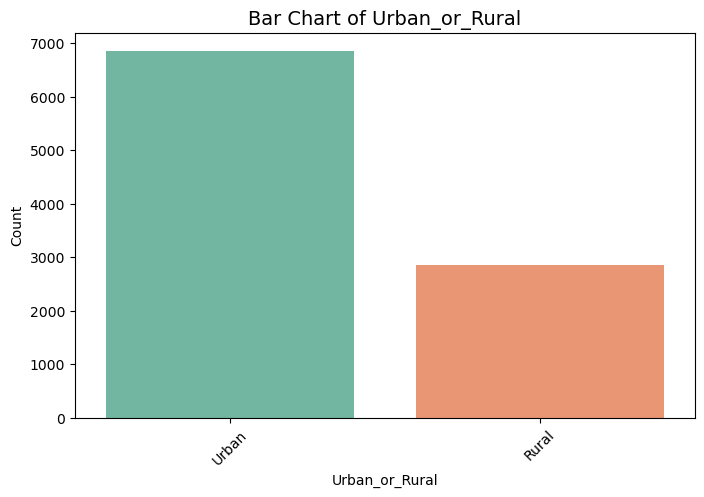

In [23]:
# Get categorical columns
cat_cols = df.select_dtypes(include=['object', 'bool']).columns
# Plot bar charts for all categorical columns
for col in cat_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, data=df, hue=col, legend=False, palette="Set2")
    plt.title(f"Bar Chart of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)  # rotate labels if long
    plt.show()

Bivariate Analysis

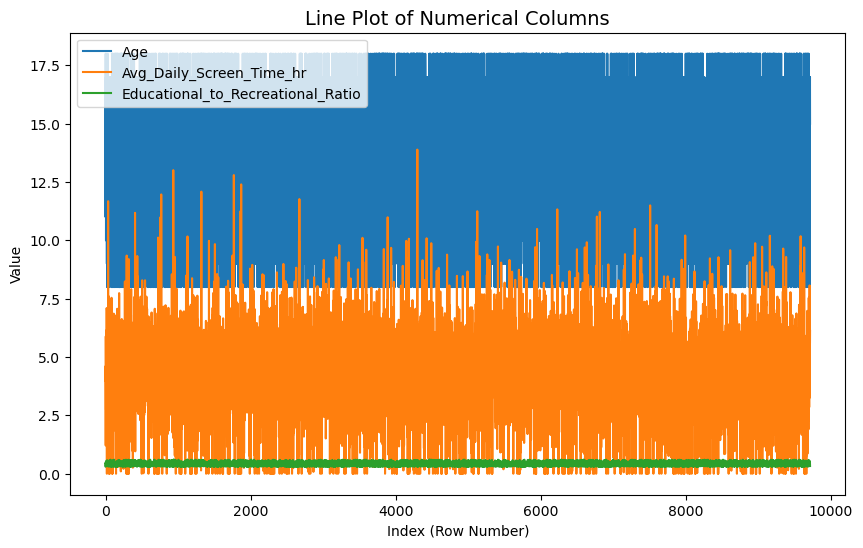

In [24]:
import matplotlib.pyplot as plt
# Select numerical columns
num_cols = ['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']
# Plot line plot for each numeric column
plt.figure(figsize=(10,6))
for col in num_cols:
    plt.plot(df.index, df[col], label=col)  # index on x-axis, values on y-axis
plt.title("Line Plot of Numerical Columns", fontsize=14)
plt.xlabel("Index (Row Number)")
plt.ylabel("Value")
plt.legend()
plt.show()

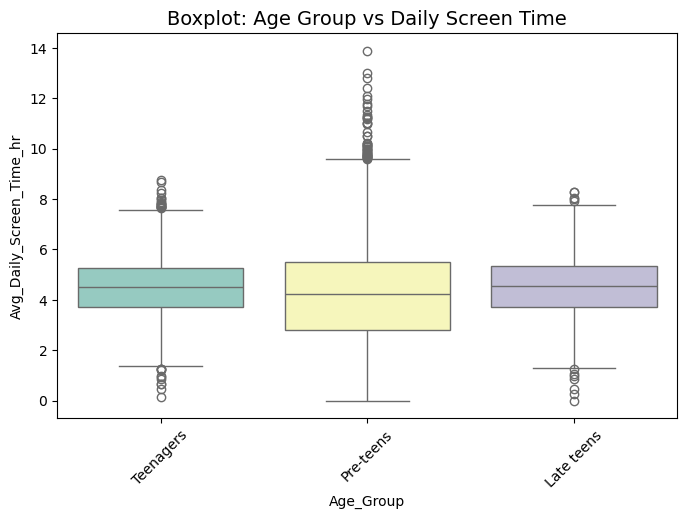

In [27]:
#Age Group vs Screen Time (Boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(
    x='Age_Group', 
    y='Avg_Daily_Screen_Time_hr', 
    data=df, 
    hue='Age_Group',    # explicitly assign hue
    palette="Set3", 
    legend=False        # removes duplicate legend
)
plt.title("Boxplot: Age Group vs Daily Screen Time", fontsize=14)
plt.xticks(rotation=45)
plt.show()

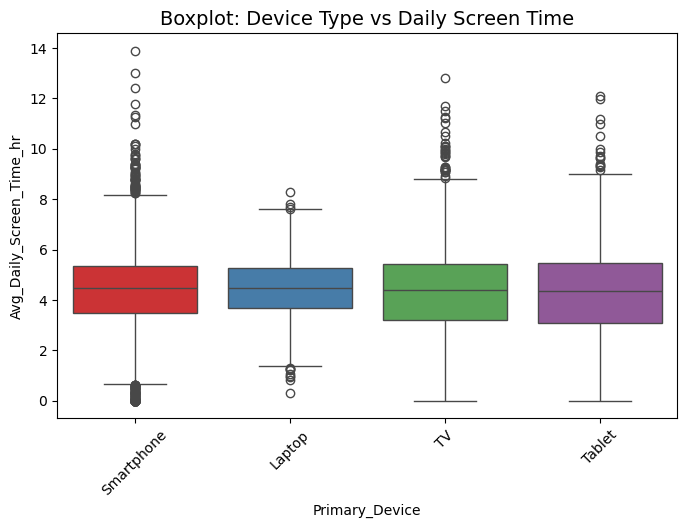

In [29]:
#Device Type vs Screen Time (Boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(
    x='Primary_Device',
    y='Avg_Daily_Screen_Time_hr',
    data=df,
    hue='Primary_Device',   # fix: explicitly assign hue
    palette="Set1",
    legend=False            # prevent duplicate legend
)
plt.title("Boxplot: Device Type vs Daily Screen Time", fontsize=14)
plt.xticks(rotation=45)
plt.show()

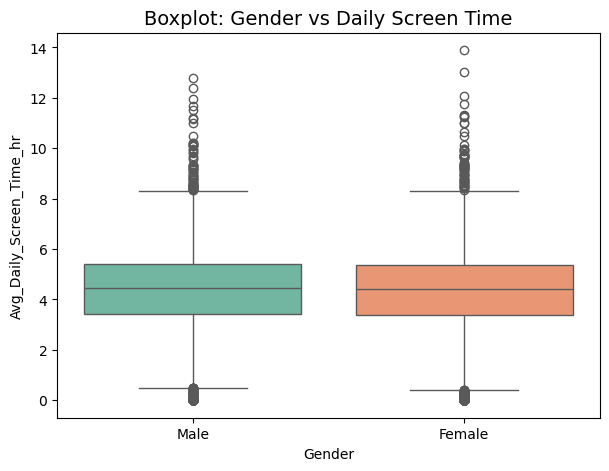

In [31]:
#Gender vs Screen Time (Boxplot)
plt.figure(figsize=(7,5))
sns.boxplot(
    x='Gender', 
    y='Avg_Daily_Screen_Time_hr', 
    data=df, 
    hue='Gender',        # fix for seaborn v0.14
    palette="Set2", 
    legend=False
)
plt.title("Boxplot: Gender vs Daily Screen Time", fontsize=14)
plt.show()

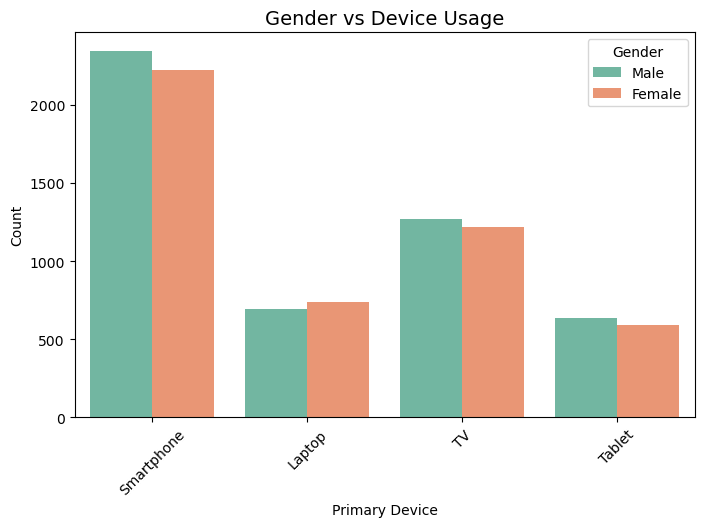

In [32]:
#Gender vs Device Usage (Grouped Bar Chart)
plt.figure(figsize=(8,5))
sns.countplot(x='Primary_Device', hue='Gender', data=df, palette="Set2")
plt.title("Gender vs Device Usage", fontsize=14)
plt.xlabel("Primary Device")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

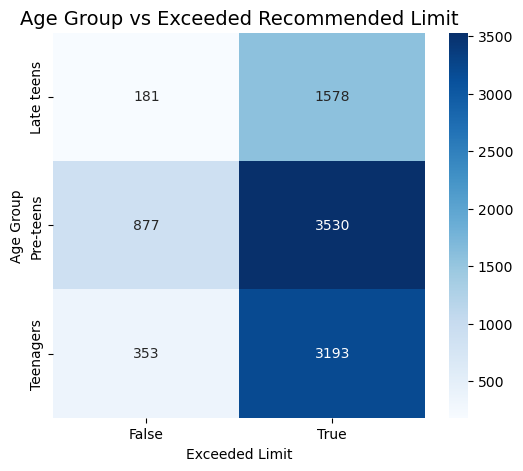

In [33]:
#Age Group vs Exceeded Limit (Heatmap)
# Create a crosstab
ct = pd.crosstab(df['Age_Group'], df['Exceeded_Recommended_Limit'])
plt.figure(figsize=(6,5))
sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.title("Age Group vs Exceeded Recommended Limit", fontsize=14)
plt.xlabel("Exceeded Limit")
plt.ylabel("Age Group")
plt.show()

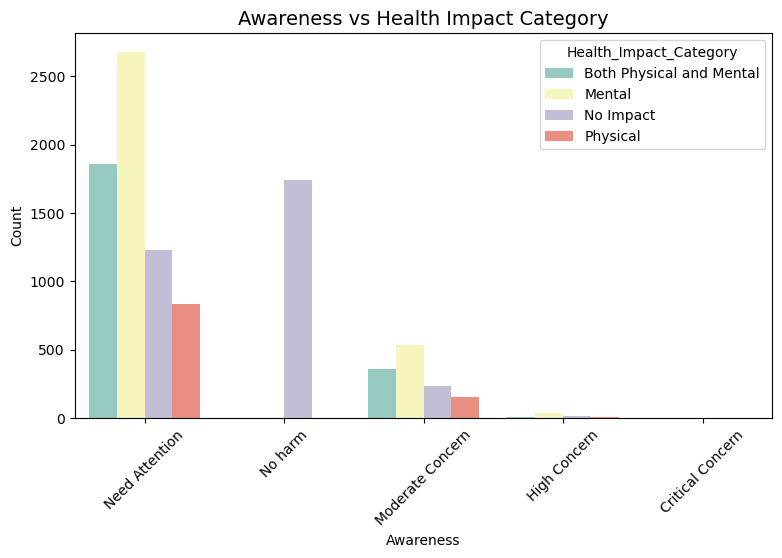

In [34]:
#Awareness vs Health Impact Category (Grouped Bar Chart)
plt.figure(figsize=(9,5))
sns.countplot(x='awareness', hue='Health_Impact_Category', data=df, palette="Set3")
plt.title("Awareness vs Health Impact Category", fontsize=14)
plt.xlabel("Awareness")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

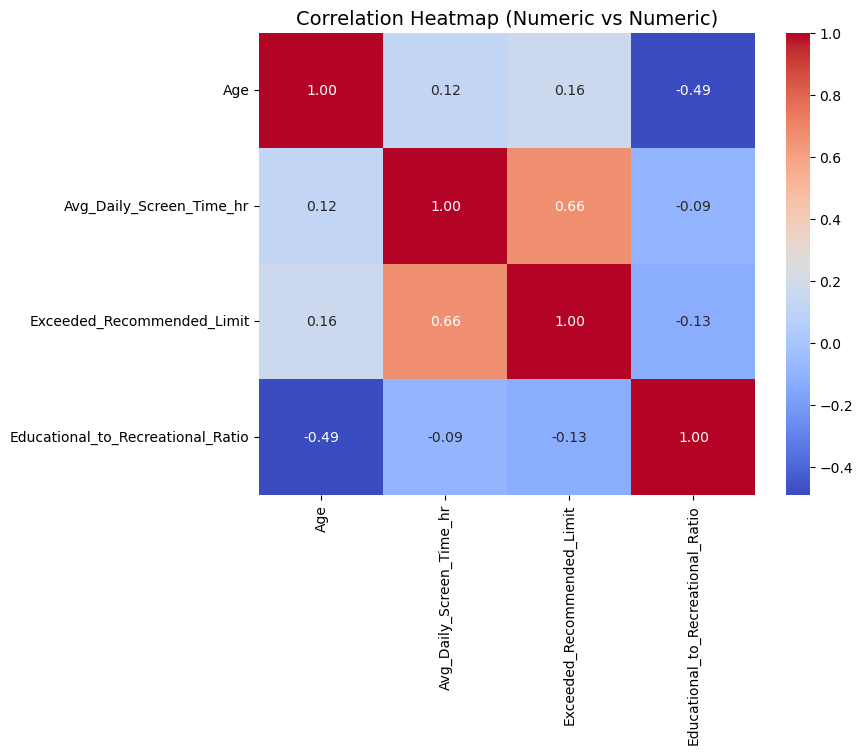

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
# Numeric vs Numeric: Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric vs Numeric)", fontsize=14)
plt.show()

Observations & Conclusion

From the univariate analysis, we observed that most students spend a moderate to high number of daily screen hours, with smartphones being the most used device. The dataset mainly consists of teenagers and young adults, and gender distribution was fairly balanced.

The bivariate analysis gave deeper insights. The correlation heatmap showed that screen time is linked with health impacts and awareness. Boxplots revealed that smartphone users generally spend more time compared to other device users. Age groups also showed differences, with younger students often exceeding healthy screen time limits. Crosstab heatmaps highlighted that even though many students are aware of health issues, they still face impacts due to excessive use.

In conclusion, students are heavily dependent on smartphones, screen time is relatively high, and while awareness about risks exists, it does not fully change behavior. This indicates a gap between knowledge and practice that needs attention